# Household Electricity Consumption Analysis and segregation, using k-Means Clustering


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import datetime as dt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'



1.Introduction

2.Downloading Data File

3.Data Cleaning and Analysis

4.Data Processing

5.K-Means Clustering
   
6.Application




<a id='Introduction'></a>
# Introduction

This project uses the k-Means clustering to classify 200 households based on their average hourly electricity consumption in the year 2010. The households were randomly selected among the ones available in the 2010 RECS data set for the Midwest region of the United States.  The data is in form of a power consumed in Watts(W) by each of the 200 households with a resolution of 10 minutes. The dataset is arranged as follows:

<a id='Downloading Data file'></a>
# Downloading Data file


In [6]:
#data=pd.read_excel('/content/drive/MyDrive/Household :S,W/Copy of Residential-Profiles.xlsx',  header='infer')
data= pd.read_excel(r'C:\Users\moham\OneDrive\Desktop\electricity projects\data\rs.xlsx')
data = data.drop([0])
data = data.rename(columns={'Residential Electricity Demand [W]': 'Time'})
data


,Time,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
1,2010-01-01 00:00:00,274.16,576.44,1523.9,659.67,1757.7,339.6,1061.9,869.47,230,...,332.37,1743,923.41,741.07,259.89,409.01,275.91,2071,1917.4,664.39
2,2010-01-01 00:10:00,318.33,425.09,914.6,349.35,1757.7,283.51,391.94,869.47,230,...,332.71,1683.7,939.12,445.06,262.8,409.01,275.91,1919.1,2215.2,294.39
3,2010-01-01 00:20:00,1031.4,425.09,1692.6,313.15,2615.3,334.73,391.94,868.31,275.62,...,1057.7,1687.5,268.28,355.4,265.97,353.04,275.4,2390.7,2196.6,272.92
4,2010-01-01 00:30:00,293.63,425.09,798.89,325.88,2482.6,1008.2,466.34,869.47,1007,...,320.73,1687.5,263.6,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.4
5,2010-01-01 00:40:00,310.84,461.19,1741.5,339,3340.5,1060,479.47,1168.3,314.83,...,317.64,2038.7,263.6,445.06,259.89,1115,995.15,2058.3,2864.6,294.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52556,2010-12-31 23:10:00,931.06,1740.9,1029.6,640.18,1923.6,241.73,230,1078.1,230,...,982.73,574.63,961.19,230,238.48,2774.5,233.9,832.88,1783.6,1644.7
52557,2010-12-31 23:20:00,924.7,973.59,365.46,640.18,600,263.48,974.26,1625,955,...,257.73,574.63,235.52,1034,962.85,1248.6,245.08,1507.4,900,919.74
52558,2010-12-31 23:30:00,1631.4,272.35,420.62,600,1132.3,988.19,321.04,1005.2,230,...,982.73,574.63,235.35,235.64,962.73,625.87,245.08,280.49,1783.5,919.74
52559,2010-12-31 23:40:00,931.06,345.94,420.61,640.18,296.28,258.33,230,972.86,230,...,999.16,574.63,236.52,303.36,237.85,674.45,245.08,832.86,600,919.74


In [8]:
#Converting time to timestamp ( a datetime object)
data['Timestamp']=pd.to_datetime(data['Time'])
data['Timestamp']


1       2010-01-01 00:00:00
2       2010-01-01 00:10:00
3       2010-01-01 00:20:00
4       2010-01-01 00:30:00
5       2010-01-01 00:40:00
                ...        
52556   2010-12-31 23:10:00
52557   2010-12-31 23:20:00
52558   2010-12-31 23:30:00
52559   2010-12-31 23:40:00
52560   2010-12-31 23:50:00
Name: Timestamp, Length: 52560, dtype: datetime64[ns]

<a id='Data Cleaning and Analysis'></a>
# Data Cleaning and Analysis



First, the time column in the data is converted to the timestamp format, to make the time operations easier. To ensure that there is no temporal gaps in the data, i.e. there is no abrupt time jump or missing data, the timestamp v/s index is plotted.

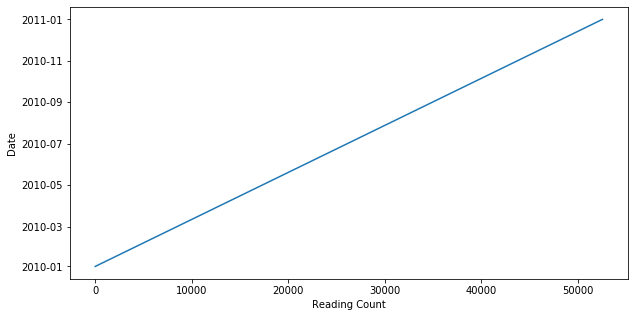

In [9]:


# Ensuring there are no temporal gaps
plt.figure(num=1, figsize=(10,5))
data.Timestamp.plot() #Plotting the newly added timestamp column
plt.xlabel('Reading Count')
plt.ylabel('Date')
plt.show()

As seen in the figure above, time vs index curve is a continuous staight line, assuring that there are no temporal gaps in the data.

.........To conform that all readings are taken at an interval of 10 minutes, the minimum and maximum differences of all the consecutive timestamps are taken, as follows:

In [10]:
# Getting the minimum difference between two consecutive timestamps:
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(data['Timestamp']))))

# Getting the maximum difference between two consecutive timestamps:
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(data['Timestamp']))) )


The minimum difference between any two consecutive timestamps is: 600000000000 nanoseconds
The maximum difference between any two consecutive timestamps is: 600000000000 nanoseconds


As seen here, the maximum and minimum diferences between all consecutive time differences were **600000000000 nanoseconds**, which is equivalent to 10 minutes, thus proving that all readings are taken at the fixed interval of 10 minutes.

To ensure that there are no NAN values in the dataset, the ___isnull___ function is used. The isnull fuction is a boolean function which returns **'False'** if the value is not NAN and returns **'True'** if value is NAN. By summing over the booleans in a column, where **'True'** gets a value of **'1'** and **'False'** gets a value of **'0'** one can count the total number of NAN values in a given column. By making list of all '0' and '1' in all columns of the dataset and finding the counts of '1' one can determine the total number of NAN values in the whole dataset, as seen below: 

In [11]:
a=list(data.isnull().sum(axis=0)==1)
a.count(True)

0

Since there was** no 'True**' returned in the whole dataset, it is ensured that there are no NAN values present in the data.

Since there is no need of the **"Time"** column, it is being dropped from the dataset

In [12]:
data=data.drop(['Time'],axis=1)
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Timestamp
1,274.16,576.44,1523.9,659.67,1757.7,339.6,1061.9,869.47,230,430.52,...,1743,923.41,741.07,259.89,409.01,275.91,2071,1917.4,664.39,2010-01-01 00:00:00
2,318.33,425.09,914.6,349.35,1757.7,283.51,391.94,869.47,230,376.24,...,1683.7,939.12,445.06,262.8,409.01,275.91,1919.1,2215.2,294.39,2010-01-01 00:10:00
3,1031.4,425.09,1692.6,313.15,2615.3,334.73,391.94,868.31,275.62,355.19,...,1687.5,268.28,355.4,265.97,353.04,275.4,2390.7,2196.6,272.92,2010-01-01 00:20:00
4,293.63,425.09,798.89,325.88,2482.6,1008.2,466.34,869.47,1007,431.07,...,1687.5,263.6,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.4,2010-01-01 00:30:00
5,310.84,461.19,1741.5,339,3340.5,1060,479.47,1168.3,314.83,351.31,...,2038.7,263.6,445.06,259.89,1115,995.15,2058.3,2864.6,294.39,2010-01-01 00:40:00


The main aim of the project is to group the data on the basis of **hourly** electricity consumption, but currently the data has a resolution of 10 minutes. Thus the data's resolution needs to be changed to **1 hour**, which is done using **_resample_** fuction available in pandas. This resample method can be used only if the datetime object (Timestamp) is the index for the pandas dataframe, thus the index of the dataframe is changed to Timestamp, before using it.

In [13]:
# Resetting the index of the dataframe
data2=data.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
# Changing the data resolution to 1 hour. 
# Since the power consumed in a hour, would be the sum of power consumed every six consecutive chunks of 
# ten minumtes, (.sum()) is used to resample the data
data2=data2.resample('H').sum()
data2

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,3271.66,2776.18,8262.19,2287.47,13800.00,3309.27,3908.49,5144.49,2333.07,2323.89,...,2678.79,10157.90,2921.61,3438.72,1574.28,3042.30,2362.50,12192.30,13013.40,2827.00
2010-01-01 01:00:00,2584.46,4093.55,5314.14,1963.21,11346.00,1846.73,3956.54,4606.45,3871.46,3755.02,...,3389.07,7580.00,1589.64,2328.64,2296.99,2927.21,1644.61,12024.80,14443.60,3164.83
2010-01-01 02:00:00,2545.17,4133.15,5317.02,3367.51,9917.00,2571.70,4831.36,3771.50,1741.73,4463.40,...,1939.78,7495.60,3039.64,3052.98,3021.74,2979.93,1631.21,12344.60,13286.00,3173.41
2010-01-01 03:00:00,2619.29,2658.86,5815.02,2003.39,11222.20,1878.19,2559.97,3872.20,1754.54,3045.04,...,1975.70,8951.50,2335.72,3113.23,1584.15,3748.24,4443.06,12678.10,13378.60,2484.48
2010-01-01 04:00:00,1892.75,4997.00,7082.01,3410.85,9579.00,4054.15,3453.00,4708.14,3929.47,2334.96,...,3426.06,8854.60,3051.50,3838.18,2309.14,3032.25,3670.18,13403.50,14872.90,2462.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 19:00:00,4772.08,7483.36,7803.00,12669.40,7902.30,16489.50,17253.20,7253.80,4625.00,5680.28,...,4489.35,6244.85,15164.30,14285.20,7778.78,10743.60,1809.63,9235.60,19377.40,8623.50
2010-12-31 20:00:00,3307.07,7058.40,7078.00,4789.14,6697.67,10506.59,9043.80,8155.70,6125.00,4150.23,...,3791.72,7444.80,12295.38,12835.10,6183.55,11288.20,2179.55,8382.00,9885.27,6648.62
2010-12-31 21:00:00,5547.08,8083.30,5737.96,3719.34,7014.48,21931.60,7353.30,8153.90,5950.00,2385.29,...,4964.34,5959.05,6163.43,6013.54,2153.76,12100.60,2904.55,8521.83,9820.20,24873.50


[Resample documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)

Currently we have electricity consumption data over each hour of each day for all 200 households, however to visualize the data we require the mean electricity consumption over all the days in the year for each household. This is done with the help of **datetime** function's attribute **.time**, which returns the hour and minute of the day from the timestamp. This attributes conventionally assigns **00:00** to midnight, **01:00** to 1 am and so on upto **23:59**. After getting the hour and minutes  of all corresponding timestamps the data was grouped by hour using the **groupby** function avaialble in pandas. The groupby function, changes the index from timestamp to an array of hours (00:00 to 23:59), with each row containing the average electricity consumption of each household to the corresponding time in the index over the whole year.

In [ ]:
# Adding a Hour column, containing Hour and Minute part of each timestamp
data2['Hour'] = pd.to_datetime(data2.index, format='%H:%M').time
data2['Hour'] = data2.Hour.apply(lambda x: x.strftime('%H:%M'))
# data2['Date'] = data2.index.date
data2.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Hour
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,3271.66,2776.18,8262.19,2287.47,13800.0,3309.27,3908.49,5144.49,2333.07,2323.89,2601.80,8523.1,9741.0,2126.39,2839.98,2290.89,5176.54,6597.26,3031.61,9230.90,3326.89,3040.38,4390.72,5558.84,2179.39,2176.62,7088.80,1876.85,7660.60,23720.0,4118.39,2737.63,2645.90,18485.0,6545.81,2684.23,5149.34,3741.93,22861.9,3671.27,...,2012.50,4014.68,3638.42,6885.21,1826.37,8299.2,5024.88,3620.48,3989.94,4843.09,6957.25,2629.52,18348.3,8365.10,1811.76,4068.36,6772.10,9043.1,3466.98,1668.72,2748.49,4020.35,1380,2393.73,10813.5,3749.71,4767.27,1627.45,4413.00,2678.79,10157.9,2921.61,3438.72,1574.28,3042.30,2362.50,12192.3,13013.4,2827.00,00:00
2010-01-01 01:00:00,2584.46,4093.55,5314.14,1963.21,11346.0,1846.73,3956.54,4606.45,3871.46,3755.02,2665.48,9853.1,8065.4,4291.04,3493.61,3800.86,6856.23,4603.04,2314.64,1873.54,1940.46,2300.64,3160.08,3717.23,2881.17,4329.60,6048.55,1940.46,7514.91,24303.4,3618.95,4792.64,4435.95,11806.1,2345.64,1987.34,3283.22,4359.76,25152.6,2936.32,...,2476.41,4719.05,3246.15,6616.96,4010.25,8976.2,3091.35,2137.06,3726.64,2997.78,7544.26,1936.91,17422.9,5189.11,4770.32,3336.11,6774.45,10288.4,2062.07,3149.58,4076.67,3897.09,1380,2424.61,9507.7,3778.52,2540.34,3079.87,2605.74,3389.07,7580.0,1589.64,2328.64,2296.99,2927.21,1644.61,12024.8,14443.6,3164.83,01:00
2010-01-01 02:00:00,2545.17,4133.15,5317.02,3367.51,9917.0,2571.70,4831.36,3771.50,1741.73,4463.40,1940.46,9256.2,7776.8,3566.10,4248.18,3764.31,5865.56,4043.31,3039.64,1842.24,2665.44,3025.64,5179.77,1882.21,3597.47,2869.71,4147.96,3390.42,8236.75,19514.7,2941.47,4790.95,3669.38,11518.5,2309.63,4136.51,4539.96,2924.62,24161.4,3055.07,...,3889.30,2581.75,3216.01,3288.45,4640.24,8237.0,3816.33,2093.09,5291.29,2997.77,8308.79,3391.10,16687.8,3104.65,5358.23,1886.46,4849.57,9568.5,2787.05,1697.65,3362.03,3295.24,2830,3147.58,9843.4,3073.03,3265.70,2354.87,4863.55,1939.78,7495.6,3039.64,3052.98,3021.74,2979.93,1631.21,12344.6,13286.0,3173.41,02:00
2010-01-01 03:00:00,2619.29,2658.86,5815.02,2003.39,11222.2,1878.19,2559.97,3872.20,1754.54,3045.04,4142.19,10405.4,8534.7,2196.57,2822.75,3937.06,5643.95,4049.05,3060.72,3358.27,2692.20,2775.25,3530.40,2637.56,2950.84,2949.96,3838.15,2692.18,7798.60,20516.9,4372.68,3535.05,2257.56,14389.8,4498.07,2704.59,7368.30,2623.41,25742.6,2299.45,...,2435.95,4903.15,3253.96,2947.93,4792.99,11101.4,3510.64,2910.14,3916.55,2320.00,7266.04,3413.80,19059.6,2479.30,4817.83,1915.02,4295.55,7973.2,3596.58,3177.48,3535.27,3326.82,2105,2452.47,10591.2,2457.23,1840.35,2367.04,1895.31,1975.70,8951.5,2335.72,3113.23,1584.15,3748.24,4443.06,12678.1,13378.6,2484.48,03:00
2010-01-01 04:00:00,1892.75,4997.00,7082.01,3410.85,9579.0,4054.15,3453.00,4708.14,3929.47,2334.96,2691.74,9775.5,8064.6,2201.97,3547.32,3117.13,7028.85,3009.83,1601.50,3333.28,3416.72,3138.22,3550.30,1912.93,2965.74,2960.72,3113.17,3416.65,8497.10,21654.8,5289.88,2793.21,8794.28,15194.6,2421.95,2770.53

In [ ]:
Hourly=data2.groupby(['Hour']).mean()
Hourly

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00:00,2884.358466,3826.232329,4466.331890,2989.938685,6072.211479,3527.872767,3306.258603,4578.510740,2590.215233,3186.418027,3093.316301,5929.490110,5417.200356,3251.241178,3731.281808,2923.891836,4323.966027,3564.620932,2607.234356,3026.830329,3140.015315,3674.031808,3468.305753,3975.207616,3556.305260,2832.738027,3330.190904,2835.616329,5602.044685,13276.395342,3663.119890,3121.551205,3613.315068,8713.912493,3888.370904,2744.230466,4717.346493,3270.311562,12880.195562,3689.065425,...,3539.854603,3497.328219,3123.982603,3414.247753,3289.210877,3250.829918,5771.897507,3620.035808,3200.636795,3654.050685,4334.566411,4495.148219,2906.732630,10826.271589,4116.962822,3637.126986,3346.419945,3542.125836,6029.759534,3923.685753,2652.714411,3693.551205,3660.775014,2545.589041,2663.932438,6528.367781,3051.092795,3315.064712,2732.523534,4029.971014,3041.731753,5854.496712,2716.329753,3627.190164,2594.102630,3838.568384,2758.757589,7384.871644,8343.120767,3721.437452
01:00,2818.847616,3407.249041,4345.696438,2770.281945,6030.410575,3323.595288,3295.754274,4277.491918,2536.363918,3057.293123,2910.837151,5961.952904,5300.366164,2983.444712,3350.241342,2790.000384,4230.750767,3189.184055,2552.448712,2696.650192,2972.040904,3413.841068,3066.883863,3400.871699,3386.261589,2797.556027,3194.274192,2736.317096,5300.068658,12396.996795,3317.673808,2960.461562,3368.152110,8350.737397,3420.446274,2651.696685,4075.756384,3094.359562,12894.853808,3393.764548,...,3334.744137,3181.572219,3014.446904,3290.822110,3030.724247,2971.339014,5618.500959,3280.661863,2916.415945,3356.236493,3834.185096,4478.841918,2790.947178,10567.515945,3874.970548,3140.272466,3173.192164,3211.931918,5744.805644,3493.805425,2464.800904,3438.323918,3554.482411,2459.835616,2421.142877,6331.544247,2979.059808,3013.722164,2541.962959,3479.301315,2828.849781,5636.112932,2497.036247,3193.313808,2529.117918,3374.590548,2560.209753,7247.549123,8035.105068,3396.757890
02:00,2654.107288,3418.624466,4247.012164,2711.193781,5993.733671,3150.975753,3182.293425,3953.777945,2528.986548,3027.585123,2820.691781,6011.390904,5282.002630,2903.034932,3263.457370,2883.858384,4150.523562,2925.724356,2572.641014,2775.439233,2862.923096,3337.775288,3078.564548,3186.357178,3262.751918,2729.469123,3094.853726,2778.949808,5243.109096,12296.829014,3339.223014,2921.165589,3182.727671,8176.845671,3321.049753,2692.753918,3821.804329,2987.230877,12980.436658,3113.020356,...,3178.418712,2865.282712,2911.233699,3079.726767,2789.781151,2924.364630,5640.793616,3163.917890,2888.933479,3334.163205,3620.201616,4498.137726,2717.539918,10351.591342,3563.803096,3048.848384,3017.009068,3101.582438,5686.849425,3374.800575,2540.622219,3303.529205,3441.056521,2427.232877,2538.225123,6355.180767,2873.554712,2870.609397,2536.284247,3257.855178,2767.310548,5503.938521,2483.051151,2991.281260,2514.891452,3239.340712,2491.512027,7359.229288,7762.277863,2982.074000

Finally we plot the **Hourly** dataframe to visulize the average daily power consumption of all the households and a mean electricity consumption over all the households.

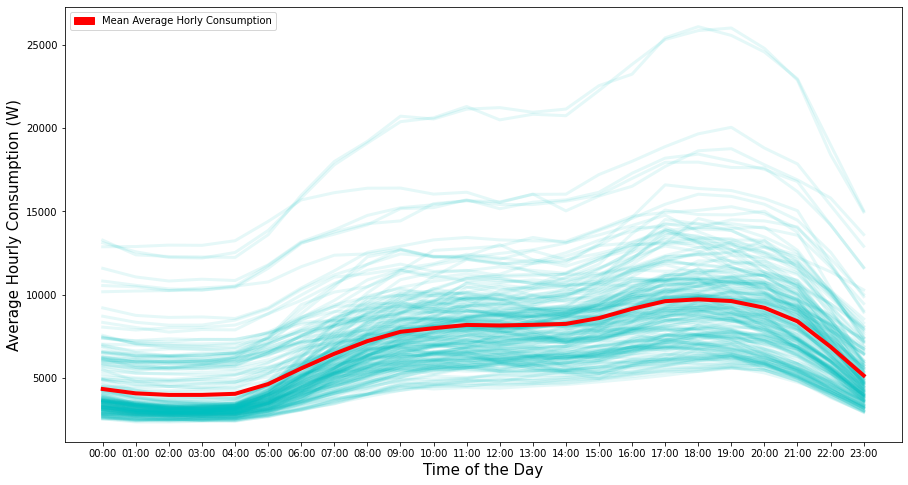

In [ ]:
plt.figure(num=2, figsize=(15,8))
plt.plot(Hourly, color='c', alpha=0.1, linewidth='3')
plt.plot(Hourly.mean(axis=1),color='r', alpha=1, linewidth='4')
#plt.ylabel('Date')
plt.ylabel('Average Hourly Consumption (W)', fontsize = 15)
plt.xticks(Hourly.index)
plt.xlabel('Time of the Day', fontsize = 15)
leg= mpatches.Patch(color='red', label='Mean Average Horly Consumption')
plt.legend(handles=[leg])
plt.show()

<a id='Data Processing'></a>

# Data Processing

Seasons play an important role in determining the electricity consumption patterns. For example, in winters, houses with electric heaters would consume a significantly higher amount of electricity in the night compared to nights in summers. To account for these seasonal variations the data is split up into four seasons as follows:

- Summer: June, July, August
- Fall: September, October, November
- Winter: December, January, February
- Spring: March, April, May

To get the month from the timestamp **_datetime_** function's attribute **.month** is used. This function returns **'1'** for month of January, **'2'** for month of february and so on upto **'12'**. The data can be further divided on basis of weekdays and weekends and so on, for better segregation, however this is out of scope for this repot.

In [ ]:
# Adding a column 'Month' to the original dataframe containing month of the corresponding dataframe
data['Month'] = data['Timestamp'].dt.month

# Making a new dataframe 'Summer' with data cooresponding to summer months
#summer = (data.Month >=6)&(data.Month <=8) # Since summer has months from July (6) to August (8)
#Summer_df=data[summer].reset_index(drop=True)
#Summer_df=Summer_df.drop('Month',axis=1)
summer = data[(data['Month']>=6) & (data['Month']<=8)].reset_index(drop=True) 
Summer_df=summer.drop('Month',axis=1)
Summer_df





,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Timestamp
0,230,230,230,230,230,230,230,1200,230,955,230,955,1625,230,230,230,900,230,230,900,230,230,230,1325,230,230,955,230,230,230,230,230,600,900,230,230,230,230,230,900,...,900,230,230,230,230,600,230,230,230,600,955,230,900,1625,230,955,1325,230,230,230,955,230,230,955,955,230,230,230,600,230,230,955,230,955,230,955,900,230,955,2010-06-01 00:00:00
1,230,230,230,230,230,230,230,1200,230,230,230,230,230,230,955,230,900,230,230,900,230,955,230,600,230,955,230,230,230,230,230,230,600,900,230,955,230,230,230,900,...,230,230,955,230,230,955,230,230,230,955,230,230,230,900,230,955,230,230,230,955,955,955,230,955,955,230,955,230,600,955,230,230,230,230,230,955,900,230,230,2010-06-01 00:10:00
2,230,230,230,230,955,955,230,1925,230,230,230,230,230,230,230,230,900,955,955,900,230,230,230,600,230,230,230,230,230,955,230,230,600,900,955,230,1325,230,230,900,...,230,230,230,230,230,230,955,230,955,230,230,230,900,600,230,230,230,230,230,230,230,900,955,230,230,230,955,955,230,230,230,230,230,230,230,230,900,230,955,2010-06-01 00:20:00
3,230,230,230,230,955,230,955,1200,230,230,230,230,955,955,230,955,1625,230,230,1625,230,230,955,600,230,230,230,230,955,955,230,230,1325,900,230,230,1325,955,230,1625,...,955,230,230,230,955,230,230,230,955,230,955,230,230,230,955,230,230,230,955,230,230,230,230,230,955,230,230,230,955,230,230,955,230,230,230,230,900,955,230,2010-06-01 00:30:00
4,230,230,230,230,230,230,955,955,230,230,230,230,900,955,230,230,1625,230,230,955,230,230,230,230,230,955,230,230,955,230,955,230,600,230,600,955,600,230,230,230,...,230,955,230,230,230,230,955,230,230,230,230,955,230,230,230,230,230,230,230,230,230,955,230,955,230,230,230,955,230,955,230,230,230,230,230,955,900,955,230,2010-06-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,2557.4,1925,230,230,230,644.52,955,1200,230,230,230,230,1678.2,1555.9,230,600,1483,1744,418.58,900,900,3612.7,230,1038.1,1589.6,230,230,900,1128.2,2932,1363.8,230,1811,3663.3,739.56,230,900,230,900,230,...,230,600,1646.1,230,230,1325,230,1922.3,3135.5,600,955,1380.8,230,900,600,789.58,955,230,1379.1,600,900,4038.4,230,230,758.28,1090.9,1212.5,900,1925,424.16,900,1088.6,900,362.48,230,1325,230,1200,2728.8,2010-08-31 23:10:00
13244,900,1925,861.85,728.98,1013.3,2159.6,955,1200,230,230,955,1570.8,230,1625,955,1325,981.95,2220.9,388.64,900,900,941.32,230,1717.2,955,230,2951.7,900,1625,900,2571.6,230,1128.7,1925,3661.4,230,900,230,900,230,...,230,230,414.46,230,230,1776.7,230,954.17,230,230,230,230,230,4131.2,1402.9,746.27,955,955,230,600,3738.1,1850.7,955,600,230,1283.4,955,1625,955,1111.7,1625,1058.6,3621.7,323.67,230,2027.6,839.85,900,4003.3,2010-08-31 23:20:00
13245,600,1200,292.46,230,230,3046.8,230,1200,230,955,230,1558.3,1977.1,2280

In [ ]:
# Making a new dataframe 'Fall' with data cooresponding to fall months
fall = data[(data['Month'] >=9) & (data['Month'] <=11)].reset_index(drop=True) # Since fall has months from September (9) to November (11)
#Fall_df=data[fall]
Fall_df=fall.drop('Month',axis=1)
Fall_df


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Timestamp
0,230,600,230,449.74,230,1260,230,1200,230,955,230,1802,1312.9,900,955,230,1592.8,900,413.46,230,1325,230,230,230,230,955,600,230,825.51,600,230,600,600,3281.2,2180.7,1625,230,955,230,230,...,230,230,230,600,955,600,230,230,230,230,955,230,230,3077.6,230,1518.7,230,1325,230,955,230,230,230,230,341.96,1625,230,600,955,573.94,230,1083.5,900,230,600,230,1554.6,230,955,2010-09-01 00:00:00
1,1633.6,955,894.42,501.08,1720.7,1395.4,955,230,230,955,230,522.43,230,1596,230,230,230,900,277.12,230,1325,230,230,230,230,230,1325,230,600,600,600,1325,600,1625,2057.2,600,230,230,230,955,...,230,230,1580.8,600,230,1039.5,1776.5,230,230,230,990.9,230,230,2594.8,1342.7,1511.6,230,230,955,230,2802.3,230,230,230,634.25,1277,600,600,230,230,230,947.12,900,359.89,230,230,230,230,3457.7,2010-09-01 00:10:00
2,1139.6,230,955,230,230,953.21,230,230,230,230,230,230,230,230,230,230,514.11,2143.8,366.34,230,600,2103.6,230,1273.1,909.02,230,3511.3,230,825.5,1325,2418.3,600,600,900,230,600,3957.6,955,230,230,...,230,230,445.69,600,230,600,2106.4,955,1315.7,2745.8,230,230,955,900,641.3,258.15,1589.2,955,955,955,3382.4,230,955,230,423.67,900,1326.2,600,230,573.9,230,1761.3,4536.3,230,955,903.08,829.69,230,2397.8,2010-09-01 00:20:00
3,230,955,230,720.81,230,230,230,955,230,230,955,230,1312.9,955,955,230,1306.8,1147.7,413.46,230,600,3130.7,230,1402.8,230,230,847.08,230,600,5189.8,1043.4,600,1325,955,230,1325,2420.6,230,955,3645.3,...,955,230,230,1325,230,1039.5,230,2131.7,3992.4,1324.8,230,1452.9,4937.1,955,230,1219.2,989.44,230,1704,230,230,3292.7,230,230,552.57,606.99,702.43,1325,955,573.94,230,413.46,1147.1,1084.9,230,230,230,230,230,2010-09-01 00:30:00
4,230,230,894.43,230,1724.8,1017.5,230,3231.1,647.46,955,955,1857.6,230,871.06,230,230,955,230,413.46,230,230,230,230,230,1634,955,600,230,455.49,600,230,600,600,955,230,230,230,955,955,1127.5,...,230,230,350.45,600,230,900,230,1366.5,230,230,990.89,811.39,448.97,230,1014,1550.9,230,955,2182.5,230,230,1811.6,230,230,502.6,230,230,955,230,230,230,413.46,900,359.89,955,230,1199.7,230,230,2010-09-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,310.09,1102.7,1201.5,338.21,1013.7,276.64,377.06,1141.7,949.62,329.15,1690,1930.7,1733,330.11,972.07,350.67,773.9,981.55,260.59,301,1390,1807.8,1045.3,305.33,377.5,343.14,386.75,1020,1512.2,3874.2,987.28,293.35,1026.5,2713.9,1740.4,1441.1,753.02,992.39,3344.5,1487.1,...,275.88,474.8,349.74,306.83,287.33,1717.6,1029.9,364.19,344.03,1057,772.52,290.7,3896.4,351.63,947.6,1031.4,301.67,1889.6,2017.9,270.27,404.92,1039.8,230,940.27,1760.1,371.07,274.29,985.63,288.01,307.37,1897.6,260.59,386.75,1653,1054.7,262.52,1304.8,3020.6,294.39,2010-11-30 23:10:00
13100,305.98,1102,1112.1,1009.1,1797.3,312.41,377.06,1141.7,

In [ ]:
# Making a new dataframe 'Winter' with data cooresponding to winter months
winter = data[(data['Month'] ==2)|(data['Month'] == 1) | (data['Month']==12)].reset_index(drop= True) # Since winter has months from January (1) to February (2) and month of december(12)
Winter_df=winter.drop('Month',axis=1)
Winter_df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Timestamp
0,274.16,576.44,1523.9,659.67,1757.7,339.6,1061.9,869.47,230,430.52,230,1023.1,1210.6,378.69,378.16,314.08,772.39,994.46,253.41,1942.3,230,370.93,1944.8,698.79,357.39,357.03,1766.1,230,1279.6,3223.9,416.66,316.35,414.01,3584,1028.8,1047.2,770.61,452.25,3686.8,994.11,...,600,1103.1,842.75,982.01,300.49,1808.4,908.61,402.66,473.13,342.88,917.82,297.18,2444,1522.4,277.97,1040.7,1026.5,1832.3,316,251.84,425.5,420.12,230,251.84,1531.2,1066.4,649.28,256.94,1386,332.37,1743,923.41,741.07,259.89,409.01,275.91,2071,1917.4,664.39,2010-01-01 00:00:00
1,318.33,425.09,914.6,349.35,1757.7,283.51,391.94,869.47,230,376.24,369.65,1816.2,1210.6,324.71,365.72,382.59,945.71,964.55,994.12,1902.8,369.65,439.85,344.18,1386.8,382.66,382.23,1115.1,369.65,1232.1,4851.9,719.56,1079.5,414.49,3508.4,1805.1,351.85,785.92,360.98,3687,431.24,...,267.5,433.72,1167.7,1064,318.92,1380.3,1835.6,1051.6,382.04,737.11,917.93,321.28,2741.9,1836.4,294.95,315.41,1740.5,2111.5,1021.6,288.99,425.5,441.16,230,1014,2251,1076.8,698.24,271.71,1021.2,332.71,1683.7,939.12,445.06,262.8,409.01,275.91,1919.1,2215.2,294.39,2010-01-01 00:10:00
2,1031.4,425.09,1692.6,313.15,2615.3,334.73,391.94,868.31,275.62,355.19,303.28,1335.1,1931.6,359.55,320.36,365.47,870.21,1702.1,268.28,2627.8,1028.3,346.93,1069.2,693.83,323.35,323.08,1025.4,303.28,1139.4,3121.9,737.72,325.03,334.32,2576.1,793.5,301.34,1556.1,1087.8,4411.7,350.18,...,305,470.52,366.1,1033.7,293.77,1158.3,438.23,1102.5,416.12,801.52,1642.8,321.74,3999.3,1036.3,308.97,315.74,980.68,1247.7,1093.4,280.2,477.8,382.54,230,280.2,2250.9,373.67,648.97,275.76,1071.8,1057.7,1687.5,268.28,355.4,265.97,353.04,275.4,2390.7,2196.6,272.92,2010-01-01 00:20:00
3,293.63,425.09,798.89,325.88,2482.6,1008.2,466.34,869.47,1007,431.07,300.98,1509.4,2041.8,379.67,364.99,449.55,848.61,994.46,263.6,677.83,1026,384.46,344.18,698.46,412.05,411.54,1042.3,300.98,1748.8,3664.5,758.91,345.86,389.38,3063.8,371.61,348.38,830.29,1117.1,3687,350.18,...,267.5,1103.1,463.59,1012.3,304.88,1217,372.47,343.12,425.95,342.88,1642.9,1046.3,3266.7,1065.5,325.95,1040.4,1036.4,1133.3,333.3,283.6,482.09,478.73,230,283.6,1531.2,429.58,698.24,275.76,291,320.73,1687.5,263.6,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.4,2010-01-01 00:30:00
4,310.84,461.19,1741.5,339,3340.5,1060,479.47,1168.3,314.83,351.31,1092.3,1671.5,1311.3,333.54,321.45,348.34,967.27,978.72,988.6,1402.6,367.35,426.31,344.18,1386.8,327.99,327.71,1115.1,367.35,1028.6,5758.6,698.88,333.71,381.17,2604.9,1453.8,326.02,805.81,331.66,3702.3,400.66,...,305,481.65,405.36,1064,314.54,1431,372.47,360.99,1097.2,1471.7,917.9,321.74,2727.4,1128,282.4,315.41,1005.7,1334.2,334.29,285.59,482.95,1088.8,230,285.59,1622.4,350.27,1374.3,275.76,331.42,317.64,2038.7,263.6,445.06,259.89,1115,995.15,2058.3,2864.6,294.39,2010-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:



# Making a new dataframe 'Spring' with data cooresponding to spring months
spring = data[(data['Month'] >=3) & (data['Month'] <=5)].reset_index(drop=True) # Since spring has months from March (3) to May (5)
Spring_df=spring.drop('Month',axis=1)


# Checking whether the assignment of data into the four dataframes is correct or not
print(len(Spring_df)) 
print(len(Summer_df))  
print(len(Fall_df))
print(len(Winter_df))
len(Spring_df)+len(Summer_df)+len(Fall_df)+len(Winter_df)==len(data) 



13248
13248
13104
12960


True

Since, the lenght of original **data** dataframe is equal to sum of lenght of the four new seasonal dataframes formed, it is proved that the data is assigned correctly to the four new **seasonal** dataframe. Lets take look at one of the new sesonal dataframe, i.e. **Summer_df**:

In [ ]:

Summer_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Timestamp
0,230,230,230,230,230,230,230,1200,230,955,230,955,1625,230,230,230,900,230,230,900,230,230,230,1325,230,230,955,230,230,230,230,230,600,900,230,230,230,230,230,900,...,900,230,230,230,230,600,230,230,230,600,955,230,900,1625,230,955,1325,230,230,230,955,230,230,955,955,230,230,230,600,230,230,955,230,955,230,955,900,230,955,2010-06-01 00:00:00
1,230,230,230,230,230,230,230,1200,230,230,230,230,230,230,955,230,900,230,230,900,230,955,230,600,230,955,230,230,230,230,230,230,600,900,230,955,230,230,230,900,...,230,230,955,230,230,955,230,230,230,955,230,230,230,900,230,955,230,230,230,955,955,955,230,955,955,230,955,230,600,955,230,230,230,230,230,955,900,230,230,2010-06-01 00:10:00
2,230,230,230,230,955,955,230,1925,230,230,230,230,230,230,230,230,900,955,955,900,230,230,230,600,230,230,230,230,230,955,230,230,600,900,955,230,1325,230,230,900,...,230,230,230,230,230,230,955,230,955,230,230,230,900,600,230,230,230,230,230,230,230,900,955,230,230,230,955,955,230,230,230,230,230,230,230,230,900,230,955,2010-06-01 00:20:00
3,230,230,230,230,955,230,955,1200,230,230,230,230,955,955,230,955,1625,230,230,1625,230,230,955,600,230,230,230,230,955,955,230,230,1325,900,230,230,1325,955,230,1625,...,955,230,230,230,955,230,230,230,955,230,955,230,230,230,955,230,230,230,955,230,230,230,230,230,955,230,230,230,955,230,230,955,230,230,230,230,900,955,230,2010-06-01 00:30:00
4,230,230,230,230,230,230,955,955,230,230,230,230,900,955,230,230,1625,230,230,955,230,230,230,230,230,955,230,230,955,230,955,230,600,230,600,955,600,230,230,230,...,230,955,230,230,230,230,955,230,230,230,230,955,230,230,230,230,230,230,230,230,230,955,230,955,230,230,230,955,230,955,230,230,230,230,230,955,900,955,230,2010-06-01 00:40:00


Each of the four seasonal data needs to be processed in the same way, the **data** dataframe was processed. The **process ** function is created for this, which also normalizes the data. Each **Hourly** usage dataframe was normalized by its largest value so that all home profiles would be on a fractional **0 to 1** scale. Since only the shape of electricity consumption trend is important
and not its magnitude, for clustering, normalizing data does not lead to loss of any important information. The four processed dataframes would be used further as inputs for clustering.

In [ ]:
def process(df):
    df.name = '%s'%df
    # Changing the resolution of the data to '1 hour'.
    df=df.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
    df=df.resample('H').sum()

    # Adding a new 'Hour' column to get the hour and minutes of all corresponding timestamps
    df['Hour'] = pd.to_datetime(df.index, format='%H:%M').time
    df['Hour'] = df.Hour.apply(lambda x: x.strftime('%H:%M'))
    df['Date'] = df.index.date

    # Grouping the dataframe by hour to get 24 hours of the day as index (0 to 23)
    Hourly=df.groupby(['Hour']).mean()

    # Normalizing the data by dividing all hourly electric consumptions of the given 
    # household, with largest houly consumption.
    Hourly_normalized=Hourly.apply(lambda x: (x / (np.max(x))))
    
    return Hourly_normalized

In [ ]:
Summer = process(Summer_df)
Summer.name = 'Summer'
Winter = process(Winter_df)
Winter.name = 'Winter'
Fall = process(Fall_df)
Fall.name = 'Fall'
Spring = process(Spring_df)
Spring.name = 'Spring'



,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,...,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00:00,0.340265,0.303588,0.321528,0.391595,0.352637,0.344170,0.209114,0.214194,0.299551,0.276631,0.345199,0.291241,0.392416,0.349689,0.314502,0.264722,0.385073,0.305793,0.424262,0.394909,0.401409,0.317706,0.302662,0.318930,0.255275,0.307693,0.251660,0.342891,0.439801,0.280324,0.291711,0.289337,0.249096,0.279778,0.273584,0.311931,0.267195,0.364878,0.270102,0.273609,...,0.309907,0.313643,0.235533,0.313196,0.241327,0.340081,0.405515,0.288241,0.330520,0.245308,0.281651,0.342157,0.282989,0.280324,0.252602,0.295674,0.405459,0.302631,0.352861,0.267736,0.401000,0.243641,0.250347,0.389480,0.395210,0.360703,0.381120,0.318214,0.473144,0.291228,0.372946,0.382140,0.399590,0.282448,0.405244,0.211462,0.406247,0.417447,0.305061,0.244267
01:00,0.334256,0.257099,0.322272,0.360664,0.355135,0.343191,0.203721,0.201087,0.274703,0.262978,0.336781,0.279007,0.357030,0.345356,0.280683,0.235508,0.344916,0.283040,0.372690,0.340426,0.377822,0.286460,0.265190,0.259085,0.246997,0.310288,0.225740,0.346443,0.363868,0.238238,0.246247,0.280995,0.222555,0.252324,0.258228,0.285032,0.237944,0.348366,0.261448,0.246892,...,0.276623,0.263674,0.208200,0.303157,0.222269,0.321061,0.380525,0.259715,0.297142,0.216166,0.223464,0.370660,0.284625,0.255131,0.251558,0.228808,0.350991,0.274612,0.330533,0.239129,0.334226,0.218545,0.230933,0.380358,0.345301,0.332394,0.353692,0.288397,0.434084,0.240771,0.327940,0.318837,0.365634,0.231535,0.343067,0.202725,0.377074,0.379723,0.265868,0.238420
02:00,0.301828,0.272363,0.299559,0.294134,0.342299,0.302168,0.216169,0.175923,0.283310,0.262307,0.305108,0.283640,0.344176,0.304366,0.285848,0.256926,0.346420,0.241332,0.404513,0.345403,0.353801,0.274038,0.247231,0.230184,0.254310,0.292860,0.225371,0.359774,0.381795,0.215730,0.242444,0.255203,0.209362,0.219952,0.220003,0.301238,0.214930,0.316756,0.262073,0.224366,...,0.260456,0.235589,0.207576,0.255494,0.196807,0.308009,0.375137,0.220604,0.272816,0.196142,0.204776,0.374862,0.264811,0.234498,0.202712,0.234674,0.337949,0.252197,0.320049,0.229214,0.362121,0.199111,0.232684,0.360605,0.386972,0.328818,0.328155,0.280419,0.420483,0.233307,0.318292,0.334610,0.353365,0.219974,0.358036,0.190786,0.353868,0.377693,0.224832,0.183324
03:00,0.299060,0.236298,0.315180,0.333884,0.339176,0.325547,0.202090,0.161047,0.281148,0.257669,0.304314,0.267660,0.339467,0.304203,0.283529,0.262958,0.333196,0.250783,0.373417,0.353495,0.341880,0.247337,0.243816,0.231960,0.241737,0.302867,0.213691,0.335823,0.338371,0.196573,0.254712,0.264956,0.188089,0.217451,0.209326,0.319185,0.215739,0.280279,0.242084,0.230583,...,0.260556,0.243982,0.216785,0.252249,0.202548,0.288062,0.384108,0.230739,0.251684,0.210380,0.190549,0.341171,0.262702,0.221527,0.191368,0.241978,0.342867,0.237969,0.337880,0.205993,0.365270,0.195181,0.216676,0.354516,0.360631,0.363793,0.321692,0.281074,0.384737,0.211647,0.319970,0.322408,0.346952,0.205001,0.376382,0.168864,0.352213,0.378499,0.257235,0.17595

Thr following **visualize** function is used to plot the normalized data for all four seasons.

In [ ]:
def visualize (df):
    plt.figure(num=2, figsize=(15,8))
    plt.plot(df, color='c', alpha=0.1, linewidth='3')
    plt.plot(df.mean(axis=1),color='k', alpha=1, linewidth='4')
    plt.title(df.name, fontsize = 20)
    plt.ylabel('Normalized Average Hourly Consumption', fontsize = 15)
    plt.xticks(df.index)
    plt.xlabel('Time of the Day', fontsize = 15)
    l = mpatches.Patch(color='black', label='Mean Normalized Average Horly Consumption')
    plt.legend(handles=[l])
    plt.show()
    

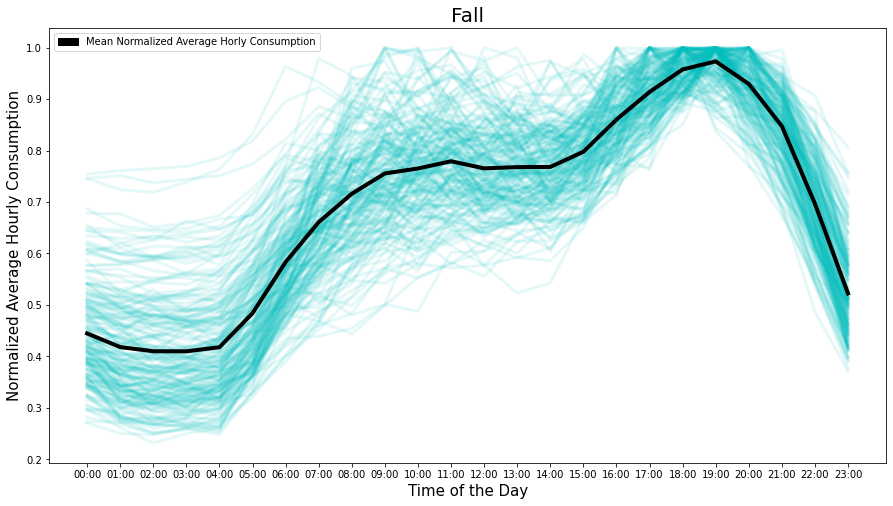

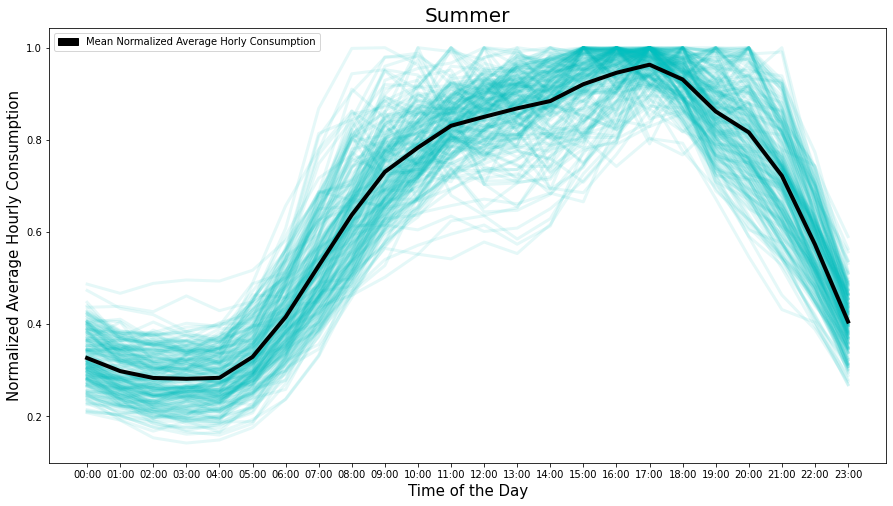

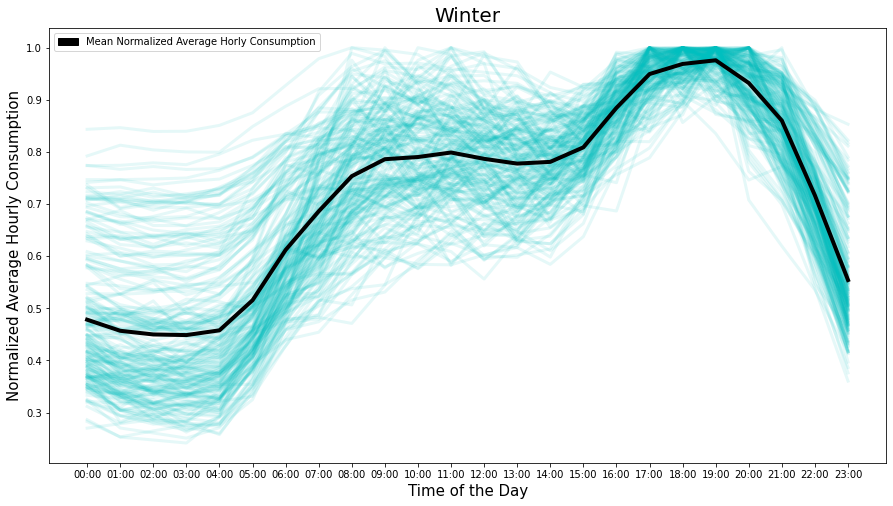

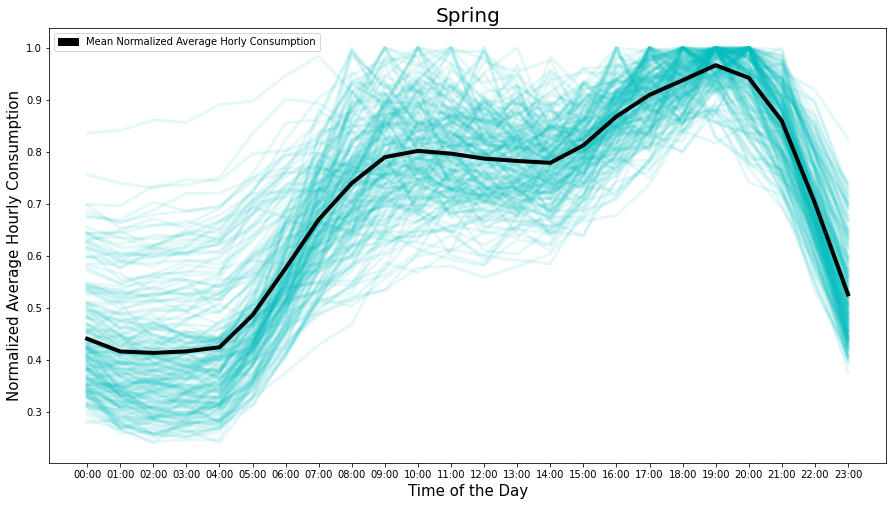

In [ ]:
visualize(Fall)
visualize(Summer)
visualize(Winter)
visualize(Spring)

<a id='K-Means Clustering'></a>
# K-Means Clustering

## How does K-Means Clustering Works?



**Step 1:** Determine the number of cluster to be obtained. This step is one of the trickiest steps for the algorithm. Since the data is unlabeled, one has to input the number of groups (or clusters) desired in the output. Since the variability in the data is unknown, it becomes difficult determine number of clusters required. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning. The three most widely used methods to determine number of clusters are:
-	 **Elbow method**
-	 Average silhouette method
-	 Gap statistic method
The elbow method is used in this project and is explained in greater detail below. For now, assume that number of clusters required were two.

**Step 2:** First two centroids  **_C1_** and **_C2_** are chosen randomly.

**Step 3:** - Then the distance from each data point to both centroids is calculated. If a point is closer to **_C1_**, then that data is labelled with ‘0’. If it is closer to **_C2_**, then labelled as ‘1’. In our case, we will color all ‘0’ labelled with red, and ‘1’ labelled with blue.

$$ \min\limits_{c_i\in{C}} dist(c_i, x)^2 $$

Here $c_i$ is C1 and C2, while _dist_ represents the euclidean distance between all datapoints (x) and centroids C1 and C2.



**Step 4:** Next mean of all blue points and all red points is calculated separately. The mean of red point is assigned as the new **_C1_** and mean of blue points is assigned as new **_C2_**. 

Let $S_i$ be the set of data points assigned of the $i^{th}$ cluster, then

$$ c_i = \frac{1}{|S_i|}\sum\limits_{x_i\in{S_i}} x_i $$

Here $c_i$ is the newly assigned $i^{th}$ cluster and $x_i$ are all the data points in $S_i$, while $|S_i|$ is the number of data points in set $S_i$



**Step 5:** Repeat step 3 with new centroids and label data to ‘0’ and ‘1’. So we get result as below :

**Step 6:** Step - 3 and Step - 4 are iterated until both centroids are converged to fixed points. (Or it may be stopped depending on the criteria we provide, like maximum number of iterations, or a specific accuracy is reached etc.) These points are such that sum of distances between data points and their corresponding centroids are minimum.




## Selecting the number of clusters for the NREL Data

The elbow method is used here to determine the number of clusters here.

The Elbow method computes within cluster sum of squares (Wss), which is the sum of square of distances between the centroid and all of data points in that centroid. The total WSS measures the compactness of the clustering and we want it to be as small as possible. Then it looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve the total WSS by much.
The optimal number of clusters can be defined as follow:
- Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 15 clusters.
- For each k, calculate the total within-cluster sum of square (wss).
- Plot the curve of wss according to the number of clusters k.
- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


The Elbow method is applied on **Summer** dataframe and following results are obtained:

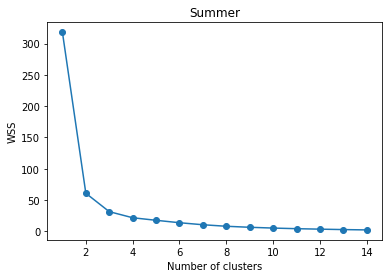

,num_clusters,WSS
0,1,318.048199
1,2,60.978200
2,3,31.613852
3,4,21.877346
4,5,17.812184
5,6,13.925397
6,7,10.703665
7,8,8.271454
8,9,6.650545
9,10,5.393568


In [ ]:
S=Summer
error_summer=[]
for k in range(1,15):
    cluster1 = KMeans(n_clusters = k)
    cluster1.fit_predict(S[S.columns[0:]])
    error_summer.append(cluster1.inertia_)

clusters_summer = pd.DataFrame( { "num_clusters":range(1,15), "WSS": error_summer } )

plt.plot( clusters_summer.num_clusters, clusters_summer.WSS, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Summer')
plt.show()

clusters_summer

As we can see from the graph and table the WSS is not significantly improved as number of clusters are increased beyond **3**, thus number of clusters desired are chosen to be 3.

Similarly the number of clusters required for all **Seasonal** dataframes are selected by elbow method as follows:

In [ ]:
def elbow(df):
    error=[]
    for k in range(1,15):
        cluster = KMeans(n_clusters = k)
        cluster.fit_predict(df[df.columns[0:]])
        error.append(cluster.inertia_)

    clusters = pd.DataFrame( { "num_clusters":range(1,15), "cluster_errors": error } )

    plt.plot( clusters.num_clusters, clusters.cluster_errors, marker = "o" )
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.title(df.name)

    plt.show()

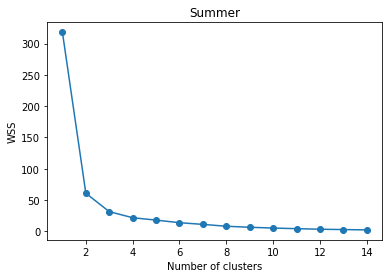

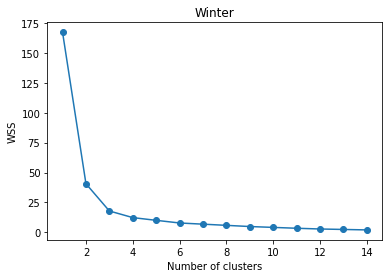

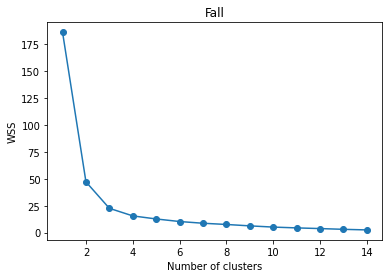

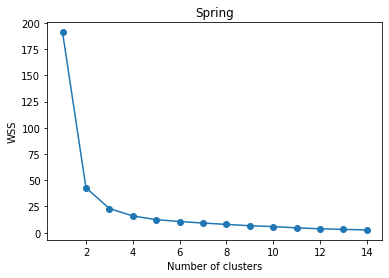

In [ ]:
elbow(Summer)
elbow(Winter)
elbow(Fall)
elbow(Spring)

After observing the WSS v/s number of clusters graphs for all the seseaonal dataframes, the number of clusters chosen for each of the dataframe is **3**.

## Applying k-Means Clustering 

The **k-Means** class function is used from **sci-kit learn** module to perform clustering on all the four **Seasonal** dataframes. The **n_clusters** attributes takes the input as an integer which is the number of clusters required in the output.

In [ ]:
def cluster(x):
    y=x.T # Since we need to assign households to clusters and not hour of the day, the dataframe is transposed
    cluster = KMeans(n_clusters = 3)
    # Adding a new column 'cluster_number' containing cluster assignment (0, 1 or 2) for each household.
    y['cluster_number']=cluster.fit_predict(y[y.columns[0:]])
    y.name = x.name
    return y

In [ ]:
s_cl = cluster(Summer)
w_cl = cluster(Winter)
f_cl = cluster(Fall)
sp_cl = cluster(Spring)

## Clustering Results

The following **Assignment** dataframe gives the cluster assignment for each household for each season:

In [ ]:
Assignment_df = pd.DataFrame(data=None, index=s_cl.index, columns=None, dtype=None, copy=False)
Assignment_df['Summer'] = s_cl['cluster_number']
Assignment_df['Winter'] = w_cl['cluster_number']
Assignment_df['Fall'] = f_cl['cluster_number']
Assignment_df['Spring'] = sp_cl['cluster_number']
Assignment_df

,Summer,Winter,Fall,Spring
Unnamed: 1,1,2,0,2
Unnamed: 2,1,2,0,2
Unnamed: 3,0,1,0,0
Unnamed: 4,0,2,0,2
Unnamed: 5,0,1,2,0
...,...,...,...,...
Unnamed: 196,1,0,1,1
Unnamed: 197,0,0,1,1
Unnamed: 198,0,1,2,0
Unnamed: 199,1,1,2,0


To plot the clustered dataset of each seasonal dataframe the following function **cluster_visualization** is formed. The plots (one for each season) consists of mean normalized power consumption for each household and a curve (darker color) showing the average of mean mormalized power consumption over all the households.

In [ ]:
def cluster_visulization(x):
    
    x_0 = x[(x.cluster_number==0)].reset_index(drop=True)
    x_0 = x_0.drop(['cluster_number'],axis=1)
    x_1 = x[(x.cluster_number==1)].reset_index(drop=True)
    x_1 = x_1.drop(['cluster_number'],axis=1)
    x_2 = x[(x.cluster_number==2)].reset_index(drop=True)
    x_2 = x_2.drop(['cluster_number'],axis=1)
    
    plt.figure(figsize=(15,8))
    plt.xlabel('Time of the Day', fontsize = 15)
    plt.ylabel('Normalized Average Power', fontsize = 15)
    plt.title(x.name, fontsize = 20)
    plt.plot((x_0).mean(), color='r')
    plt.plot(x_0.T, color = 'r', alpha = 0.03)
    plt.plot((x_1).mean(), color='b')
    plt.plot(x_1.T, color = 'b', alpha = 0.03)
    plt.plot((x_2).mean(), color='g')
    plt.plot(x_2.T, color = 'g', alpha = 0.05)
    
    c = mpatches.Patch(color='red', label='Cluster 1')
    d = mpatches.Patch(color='blue', label='Cluster 2')
    e = mpatches.Patch(color='green', label='Cluster 3')
    
    plt.legend(handles=[c,d,e])
    
    plt.show()     

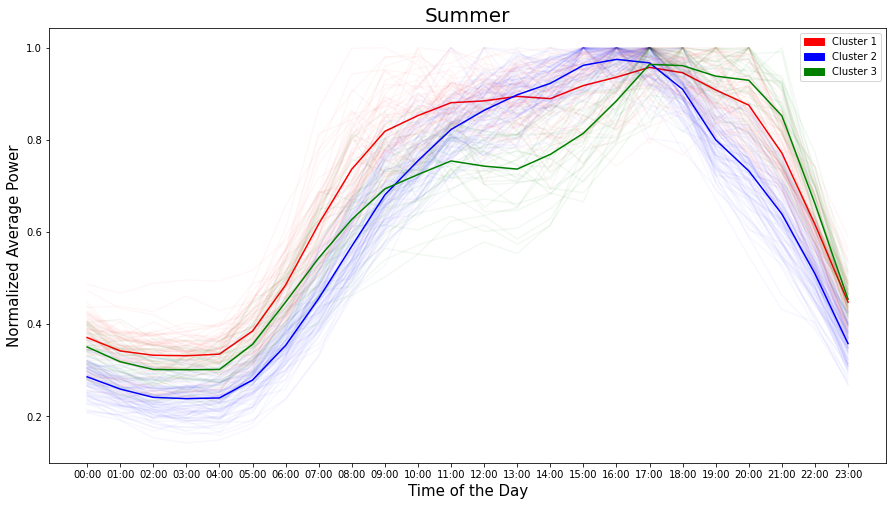

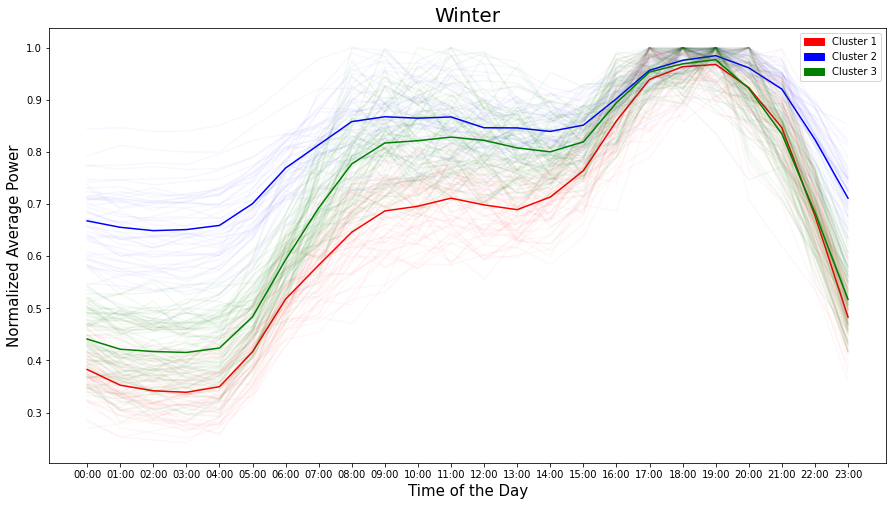

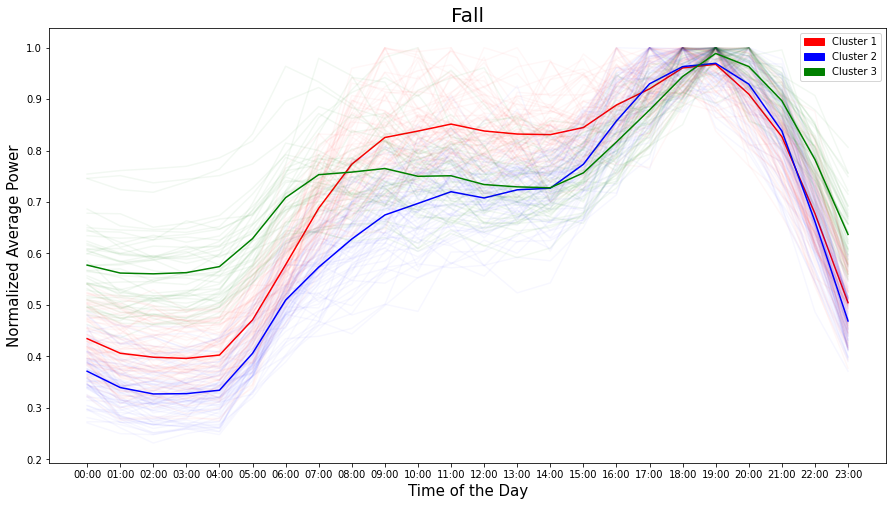

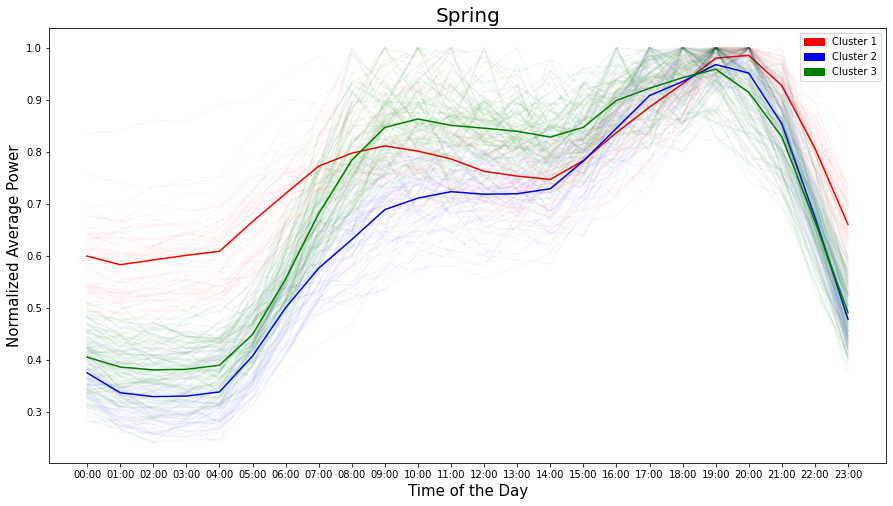

In [ ]:
cluster_visulization(s_cl)
cluster_visulization(w_cl)
cluster_visulization(f_cl)
cluster_visulization(sp_cl)

## Results and Interpretation

The general trend in the electricity consumption is observed to be a peak in consumption during evening, possibly due to presence of people in household which would lead to use more appliances. Further there is continuous decrease in consumption of electricity in the night, possibly due to people going to sleep. There is a short rise in consumption in the morning around 6:00, when people in household get ready to leave for work or school. 
-	For the summer season’s data clustering, it is observed that households in cluster 1 on an average have a highest consumption for most of the day, except for 1:00 to 5:00, when cluster 2 has slightly higher consumption. Households assigned to cluster 3 shows a dip in electricity consumption during the afternoon, i.e. 12:00 to 5:00, possibly due to absence of any people in the home during that time.
-	For the winter Cluster 1 and cluster 3 households show a two-peak energy consumption, while cluster 2 households show a pretty much stable use throughout the day. It is possible that there are people using appliances in households during afternoon which leads to comparatively higher consumption in cluster 2 compared to other two. All the households reach peak consumption during evening, however compared to summer time the consumption during afternoon is much higher, possibly due to use of electrical heaters. 
-	 For fall and spring, the trends in electricity consumption are pretty much the same. Also, the cluster allotment in these two seasons are similar. One cluster shows a stable consumption from 12:00 in afternoon to 9:00 in night, while the other two clusters show two different peaks in daily consumption, mainly in the morning around 6:00 and in evening around 7:00.


## Principal Component Analysis for Data Visualiztion

Although the four graphs showing the hourly trends of the electricity consumption in each season show the clustered data in separate colors, it is not known how well the data has been segregated into the three clusters. It would be helpful to visualize this clustered data to understand how the data is clustered. Visualizing 2 or 3-dimensional data is not that challenging. However, in our case the data is 24-dimensional, each dimension representing the one hour of the day. Thus, PCA is used to reduce that 24-dimensional data into 2 so that we can plot and hopefully understand the data better. It should be noted that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. 

To compute principal components the **PCA** and **Standard Scalar** fuctions are used from the **sci-kit learn** module. First the cluster_number labelled data frame is seperated into **features** and **target**, where features has all the columns except the labels (which is the cluster_number column) and target is the column containing the labels. After this the features dataframe is transgormed into a **pricipal** dataframe containing the 2 principal components, using the **fit_transform** attribute of the pca function. 

Before plotting this 2-D data, one must check the accuracy of the transformation. This is important as while when convert 24 dimensional space to 2 dimensional space, there is loss ofsome of the variance (information). By using the attribute **explained_variance_ratio**, we get a a tuple with two numbers. The first number gives the varience (information) contained in first principal component while the second number gives the varience of the second principal component. The sum of the two components gives the total percentage of information conserved during the transformation. As a rule of thumb the PCA results are considered to be reliable only if this resultant sum is above 0.85, as loss of more than 15% information, leads to inaccurate results.

The following function **pca_accuracy** is used to compute the variance ratio of all the four seasonal dataframes as follows:

[Example of PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [ ]:
def pca_accuracy (df):
    x=df.iloc[:,:-2].values
    y=df.iloc[:,-1].values
    pca=PCA(n_components=2)
    principal_components=pca.fit_transform(x)
    principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
    z = pca.explained_variance_ratio_
    return (z[0]+z[1])

In [ ]:
print('Explained Variance Ratio for Summer season is', (pca_accuracy(s_cl)))
print('Explained Variance Ratio for Winter season is', (pca_accuracy(w_cl)))
print('Explained Variance Ratio for Fall season is', (pca_accuracy(f_cl)))
print('Explained Variance Ratio for Spring season is',(pca_accuracy(sp_cl)))

Explained Variance Ratio for Summer season is 0.7584284022588837
Explained Variance Ratio for Winter season is 0.8620075179131117
Explained Variance Ratio for Fall season is 0.7760465639491108
Explained Variance Ratio for Spring season is 0.7743622943980469


Since the **explained varience ratio** is above 0.85 for only **Winter** season's data, the pca visualization is performed only on this data. To perform PCA the winter season's dataframe is split into features and target as mentioned above. After transforming the features dataframe into principal dataframe as mentioned above, the target datafrmar is concatenated to the principal dataframe to form the **final_df** dataframe as seen below:

In [ ]:
x_component=w_cl.iloc[:,:-2].values
y_component=w_cl.iloc[:,-1].values

x_component
#y_component

array([[0.50001891, 0.48012878, 0.45763098, ..., 0.96412763, 0.82944969,
        0.71286845],
       [0.40163257, 0.39666327, 0.3796449 , ..., 0.89766828, 0.82437685,
        0.66612712],
       [0.66604554, 0.63376758, 0.61727907, ..., 0.96451266, 0.9771512 ,
        0.85260902],
       ...,
       [0.77404327, 0.76659651, 0.77194522, ..., 0.99445599, 0.94578856,
        0.89431874],
       [0.67337973, 0.64636292, 0.64042681, ..., 1.        , 0.96376401,
        0.85717538],
       [0.34842045, 0.30592469, 0.28710911, ..., 0.94279562, 1.        ,
        0.71328978]])

In [ ]:
x_component=w_cl.iloc[:,:-2].values
y_component=w_cl.iloc[:,-1].values
pca=PCA(n_components=2)
principal_components=pca.fit_transform(x_component)
principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
y_component=pd.Series(y_component.T)
finalDf = pd.concat([principal_df, y_component], axis = 1, ignore_index=False)
finalDf=finalDf.rename(columns={0: 'target'})
finalDf

,Component 1,Component 2,target
0,-0.044202,-0.135616,1
1,-0.198283,0.092334,1
2,0.693681,0.181183,2
3,0.015459,0.167196,1
4,0.632672,-0.203336,2
...,...,...,...
195,-0.348407,0.023201,0
196,-0.282920,-0.230984,0
197,0.845044,-0.166408,2
198,0.558681,-0.082626,2


Finally the **final_df** dataframe is plotted to visualize the cluster formation of Winter season's dataframe, as seen below:

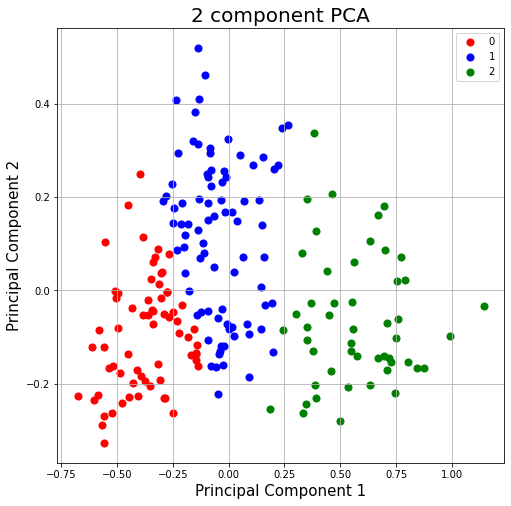

In [ ]:
plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()
plt.show()

As expected the clusters with lowest euclidean distance to a given centroid are assigned to that centroid.

<a id='Application'></a>
# Application

Apart from making electricity consmption forecasts, this kind of household electricity consumption clustering has a huge significance in Demand Response program initiatives. Demand response refers to shifting electricity utiliztion from peak hours to low consumtion time through time based price variation. By keeping the rates higher during peak electricity consumption and lower during lower consumption times, utilities can force consumers to utilize electriity during time of lower use, shifting the burden during peak consumption. Electric utilities can save millions of dollars and KW of energy through such shift in consumption.

Clustering of households based on their electricity consumption trends would help utilities identify which houses would prove to be responsive to such price variations and which houses won't. It is observed that households with peak electricity consumption in evening and morning are more responsive to demand response initiatives, compared to household that already have a nearly constant consumption throughout the afternoon and evening. Clustering is the easiest way to segregate households in such groups, thus helping utility companies decide the electricity prices to be kept during different time of the day, such that there is significant energy and monetary savings, with minimal increase in prices.